In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv (ride_data_to_load)
# Combine the data into a single dataset

Total_complete = pd.merge(ride_data,city_data, on = "city")
full_data = Total_complete
Number_of_rides = (full_data.groupby("city").count())["date"]
Number_of_rides = pd.DataFrame(Number_of_rides)
Number_of_rides = Number_of_rides.rename(columns = {"date":"Number of rides"})
Number_of_rides = Number_of_rides.reset_index()

Total_rides = full_data.groupby("city").mean()
Total_rides = Total_rides.rename(columns = {"fare": "Total Fare"})
Total_rides = Total_rides.reset_index()
Total_rides = Total_rides[["city","Total Fare"]]

full_data = full_data.drop_duplicates("city")
full_data = full_data.reset_index()
del full_data["index"]
# Display the data table for preview

In [2]:
full_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

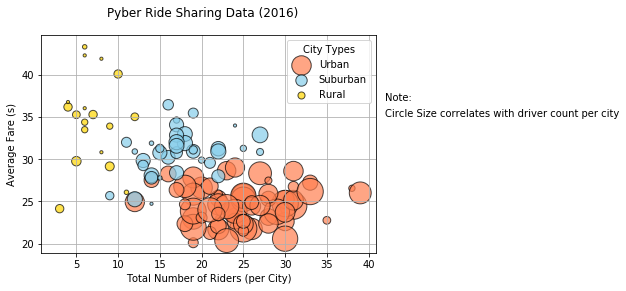

In [3]:
# Obtain the x and y coordinates for each of the three city types
full_data = pd.merge(full_data, Number_of_rides, on ="city")
full_data = pd.merge(full_data, Total_rides, on ="city")

driver_count = full_data.groupby("city").sum()
driver_count = driver_count.reset_index()
driver_count = driver_count.rename(columns = {"driver_count":"Total Count"})
driver_count = driver_count[["city","Total Count"]]

full_data = pd.merge(full_data,driver_count, on ="city")

urban_cities = full_data.loc[full_data["type"] == "Urban",["Number of rides","Total Fare","Total Count"]]
suburban_cities = full_data.loc[full_data["type"] == "Suburban",["Number of rides","Total Fare","Total Count"]]
rural_cities = full_data.loc[full_data["type"] == "Rural",["Number of rides","Total Fare","Total Count"]]
# Build the scatter plots for each city types

fig, main = plt.subplots()
main.scatter(urban_cities["Number of rides"], urban_cities["Total Fare"],c= "coral",edgecolors = "black", s = 10*urban_cities["Total Count"],alpha = 0.7, label = "Urban")
main.scatter(suburban_cities["Number of rides"], suburban_cities["Total Fare"],c= "SkyBlue",edgecolors = "black", s = 10*suburban_cities["Total Count"],alpha = 0.7, label = "Suburban")
main.scatter(rural_cities["Number of rides"], rural_cities["Total Fare"],c= "gold",edgecolors = "black", s = 10*rural_cities["Total Count"],alpha = 0.7, label = "Rural")

# Incorporate the other graph properties
fig.suptitle("Pyber Ride Sharing Data (2016)", fontsize=12)
main.grid()
main.set_ylabel("Average Fare (s)")
main.set_xlabel("Total Number of Riders (per City)")

# Create a legend
main.legend(title = "City Types")

# Incorporate a text label regarding circle size

plt.text(42,37,"Note:")
plt.text(42,35,"Circle Size correlates with driver count per city")

# Save Figure
plt.savefig("Pyber_Rise_data.png")

## Total Fares by City Type

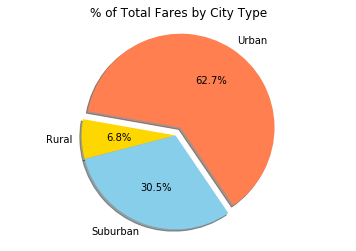

In [4]:
# Calculate Type Percents
Fare_percent = Total_complete.groupby("type").sum()
Fare_percent = Fare_percent.reset_index()
Fare_percent = Fare_percent[["type","fare","driver_count"]]
# Build Pie Chart
Colors = ["gold","SkyBlue","coral"]
percents = ((Fare_percent["fare"][0])/Fare_percent["fare"].sum(),(Fare_percent["fare"][1])/Fare_percent["fare"].sum(),(Fare_percent["fare"][2])/Fare_percent["fare"].sum())
plt.pie(percents,labels = Fare_percent["type"], shadow = True, colors = Colors, explode = (0,0,.1), startangle = 170,autopct="%1.1f%%")
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Fares_city_type.png")



## Total Rides by City Type

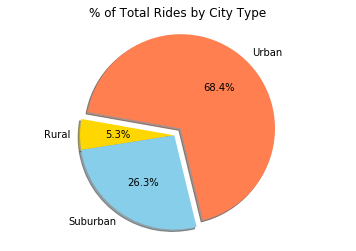

In [5]:
# Calculate Ride Percents
Percentage = Total_complete.groupby("type").count()
Percentage = Percentage.reset_index()
Percentage = Percentage[["type","city"]]

# Build Pie Chart
Colors = ["gold","SkyBlue","coral"]
# Rural / Suburban / Urban
percents = ((Percentage["city"][0])/Percentage["city"].sum(),(Percentage["city"][1])/Percentage["city"].sum(),(Percentage["city"][2])/Percentage["city"].sum())
plt.pie(percents,labels = Percentage["type"], shadow = True, colors = Colors, explode = (0,0,.1), startangle = 170,autopct="%1.1f%%")
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Rides_city_type.png")


## Total Drivers by City Type

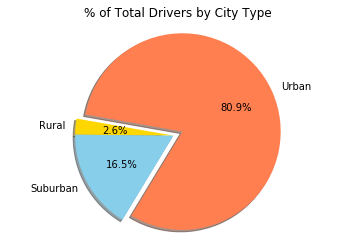

In [6]:
# Calculate Ride Percents
Drivers_percent = (full_data.groupby("type").sum()).reset_index()
Drivers_percent = Drivers_percent[["type","driver_count"]]

# Build Pie Chart
percents = ((Drivers_percent["driver_count"][0])/Drivers_percent["driver_count"].sum(),(Drivers_percent["driver_count"][1])/Drivers_percent["driver_count"].sum(),(Drivers_percent["driver_count"][2])/Drivers_percent["driver_count"].sum())
plt.pie(percents,labels = Drivers_percent["type"], shadow = True, colors = Colors, explode = (0,0,.1), startangle = 170,autopct="%1.1f%%")
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Drivers_city_type.png")
